CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS

APPLIED DATA SCIENCE

INTRODUCTION - BUSINESS PROBLEM

In this project, I would be analyzing the safest and most secured place for an immigrant to live in Georgia, United states of America. This would be targeted specifically for areas with the lowest crime rate which are also close to the state's capital, Atlanta and where a young lady can easily get a job at a restuarant for a start.

I will make use of data analysis tools to determine the best part of town to reside in.

DATA

Based on the problem, I would find out the:

* The safest area in Georgia using https://www.atlantapd.org/Home/ShowDocument?id=3337
* Foursquare API will also be used to determine the top restuarants to work in the area

METHODOLOGY SECTION

I would visualise the crime report to determin the safest neighborhoods in the state. I would then use the data to determine the top restuarants to work in. 
I would also use K-means. K-means is a form of unsupervised machine learning algorithm that clusters data based on defined cluster size. This would group data based on existing venues which would help with the decision making

First of all, I will import all necessary libraries

In [4]:
# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

# convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

# library to handle requests
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules for data visualizatio
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [5]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
print('Library imported.')

Library imported.


In [6]:
#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.0.2


I will use the built in "add data" option to read my data into Python

In [7]:
# The code was removed by Watson Studio for sharing.

,offense_id,rpt_date,occur_date,occur_time,poss_date,Year,poss_time,beat,apt_office_prefix,apt_office_num,location,MinOfucr,dispo_code,shift,loc_type,UC2_Literal,ibr_code,neighborhood,npu,lat,long,District
0,200090796,1/9/2020,1/7/2020,11:00,1/9/2020,2020,10:20,301.0,NaN,NaN,728 PEARCE ST SW,511,NaN,D,20.0,BURGLARY,2202,Adair Park,V,33.72840,-84.40798,SouthWest
1,200091665,1/9/2020,1/6/2020,12:00,1/9/2020,2020,15:45,301.0,NaN,NaN,884 OAKHILL AVE SW,531,NaN,E,20.0,BURGLARY,2202A,Adair Park,V,33.73084,-84.40909,SouthWest
2,200100029,1/10/2020,1/9/2020,21:30,1/10/2020,2020,0:00,301.0,NaN,NaN,675 METROPOLITAN PKWY SW,640,NaN,M,18.0,LARCENY,2305,Adair Park,V,33.73653,-84.41018,SouthWest
3,200111591,1/11/2020,1/11/2020,17:30,1/11/2020,2020,17:30,303.0,NaN,NaN,RALPH D ABERNATHY BLVD SW / WELLS ST SW,710,10,NaN,23.0,AUTO THEFT,2404,Adair Park,V,33.73821,-84.41022,SouthWest
4,200171312,1/17/2020,1/17/2020,13:00,1/17/2020,2020,14:00,301.0,NaN,NaN,680 MURPHY AVE SW,690,NaN,E,99.0,LARCENY,2399,Adair Park,V,33.73653,-84.41018,SouthWest


Let's drop unnecessary columns to only include the neigbnorhood, latitude, longitude, district and crime

In [8]:
atl_crime.drop(['offense_id', 'rpt_date', 'occur_date', 'occur_time', 'poss_date', 'poss_time', 'beat', 'apt_office_prefix', 'apt_office_num', 'location', 'MinOfucr', 'dispo_code', 'shift', 'loc_type', 'ibr_code', 'npu'], axis = 1, inplace = True)
atl_crime.head()

,Year,UC2_Literal,neighborhood,lat,long,District
0,2020,BURGLARY,Adair Park,33.72840,-84.40798,SouthWest
1,2020,BURGLARY,Adair Park,33.73084,-84.40909,SouthWest
2,2020,LARCENY,Adair Park,33.73653,-84.41018,SouthWest
3,2020,AUTO THEFT,Adair Park,33.73821,-84.41022,SouthWest
4,2020,LARCENY,Adair Park,33.73653,-84.41018,SouthWest


In [9]:
# to find out the size of our data
atl_crime.shape

(11233, 6)

In [10]:
atl_crime.rename(columns={'UC2_Literal':'Crime', 'neighborhood':'Neighborhood', 'lat': 'Latitude', 'long': 'Longitude'}, inplace = True)

In [11]:
#cleaning up the data to remove data with n/a
atl_crime = atl_crime.dropna()
atl_crime.head()

,Year,Crime,Neighborhood,Latitude,Longitude,District
0,2020,BURGLARY,Adair Park,33.72840,-84.40798,SouthWest
1,2020,BURGLARY,Adair Park,33.73084,-84.40909,SouthWest
2,2020,LARCENY,Adair Park,33.73653,-84.41018,SouthWest
3,2020,AUTO THEFT,Adair Park,33.73821,-84.41022,SouthWest
4,2020,LARCENY,Adair Park,33.73653,-84.41018,SouthWest


In [12]:
atl_crime.shape

(10623, 6)

In [13]:
atl_crime['Neighborhood'].value_counts()

Downtown                       943
Midtown                        782
Old Fourth Ward                308
Lindbergh/Morosgo              245
Home Park                      203
West End                       196
North Buckhead                 182
Inman Park                     182
Edgewood                       177
Vine City                      171
Lenox                          163
Grant Park                     155
Pittsburgh                     153
English Avenue                 145
Lindridge/Martin Manor         145
Sylvan Hills                   142
Greenbriar                     139
Sweet Auburn                   138
Grove Park                     135
Oakland City                   131
Campbellton Road               124
Morningside/Lenox Park         123
Adamsville                     121
Berkeley Park                  120
Lakewood Heights               120
Virginia Highland              117
Castleberry Hill               117
Buckhead Village               113
Perkerson           

We see that downtown is the neighborhood with the highest crime. So it is not adviseable for my client to live there.

In [15]:
#let's figure out the district with the highest and lowest crime rate
atl_crime['District'].value_counts()

SouthWest       2588
East Side       2042
Buckhead        1364
Midtown         1176
SouthEast       1097
Downtown        1060
NorthWest       1033
West Midtown     263
Name: District, dtype: int64

Visualizing the data to see the districts and their crime rates 

In [16]:
atl_crime_dist = pd.pivot_table(atl_crime,
                               values=['Year'],
                               index=['District'],
                               columns=['Crime'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
atl_crime_dist

Year                                                    \
Crime        AGG ASSAULT AUTO THEFT BURGLARY HOMICIDE LARCENY MANSLAUGHTER   
District                                                                     
Buckhead              53        218      155        5     905            0   
Downtown             112         99       85        6     712            0   
East Side            109        243      210        7    1411            0   
Midtown               46        152       89        4     859            1   
NorthWest            183        149      135       12     508            1   
SouthEast            178        183      118        8     560            0   
SouthWest            445        364      419       28    1182            0   
West Midtown           7         38       35        0     178            0   
All                 1133       1446     1246       70    6315            2   

                             
Crime        ROBBERY    All  
District                     
Buckhead          28   1364  
Downtown          46   1060  
East Side         62   2042  
Midtown           25   1176  
NorthWest         45   1033  
SouthEast         50   1097  
SouthWest        150   2588  
West Midtown       5    263  
All              411  10623

Data cleaning for a better presentation

In [17]:
atl_crime_dist.reset_index(inplace = True)
atl_crime_dist.columns = atl_crime_dist.columns.map(''.join)
atl_crime_dist.rename(columns={'YearAGG ASSAULT': 'AGG ASSAULT', 'YearAUTO THEFT': 'AUTO THEFT', 'YearBURGLARY': 'BURGLARY', 'YearHOMICIDE': 'HOMICIDE', 'YearLARCENY': 'LARCENY', 'YearMANSLAUGHTER': 'MANSLAUGHTER', 'YearROBBERY': 'ROBBERY', 'YearAll': 'Total'}, inplace=True)
atl_crime_dist = atl_crime_dist.head(8)
atl_crime_dist

,District,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY,MANSLAUGHTER,ROBBERY,Total
0,Buckhead,53,218,155,5,905,0,28,1364
1,Downtown,112,99,85,6,712,0,46,1060
2,East Side,109,243,210,7,1411,0,62,2042
3,Midtown,46,152,89,4,859,1,25,1176
4,NorthWest,183,149,135,12,508,1,45,1033
5,SouthEast,178,183,118,8,560,0,50,1097
6,SouthWest,445,364,419,28,1182,0,150,2588
7,West Midtown,7,38,35,0,178,0,5,263


Data Visualization - Bar chart of Districts in Georgia with crime rates

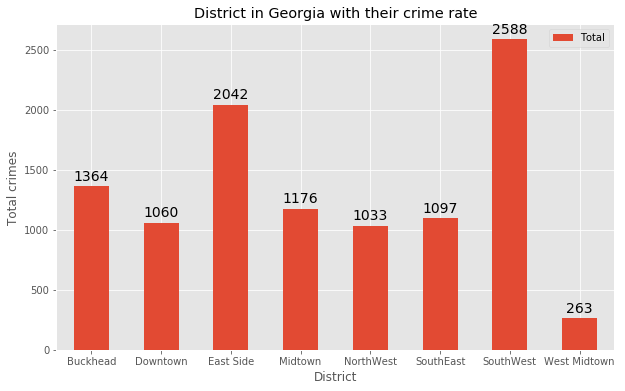

In [18]:
per_district = atl_crime_dist[['District','Total']]

per_district.set_index('District',inplace = True)

ax = per_district.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Total crimes')
ax.set_xlabel('District')
ax.set_title('District in Georgia with their crime rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

We can see that the SouthWest District has the highest crime rate while the West Midtown district has the lowest crime rate in Georgia

Now that we know the district with the lowest crime rate is West Midtown, let us see the safest neighborhood in that district

Data Visualization - Further analysis of the district with the lowest crime rate

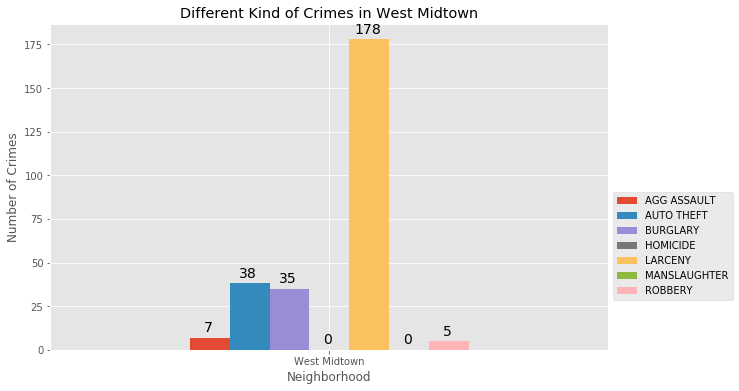

In [19]:
atl_wmd_df = atl_crime_dist[atl_crime_dist['District'] == 'West Midtown']

atl_wmd_df = atl_wmd_df.sort_values(['Total'], ascending = True, axis = 0)

atl_wmd = atl_wmd_df[['District','AGG ASSAULT', 'AUTO THEFT', 'BURGLARY', 'HOMICIDE', 'LARCENY', 'MANSLAUGHTER', 'ROBBERY']]


atl_wmd.set_index('District',inplace = True)

ax = atl_wmd.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('Different Kind of Crimes in West Midtown')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

In West Midtown, there has not been a case of Manslaughter and Homicide in 2020. But a relatively high occurance of larceny. Using this fact, I would recommend this district for living. However, let us see the breakdown of neighborhoods in the district. 

In [20]:
alt_wmd_neigh = atl_crime_dist

alt_wmd_neigh = alt_wmd_neigh[alt_wmd_neigh['District'] == 'West Midtown']
alt_wmd_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Midtown District', len(alt_wmd_neigh['District'].unique()))

alt_wmd_neigh['District'].unique()

Number of Neighbourhoods in West Midtown District 1


array(['West Midtown'], dtype=object)

In [21]:
westmidtown_data = atl_crime[atl_crime['District'] == 'West Midtown'].reset_index(drop=True)
westmidtown_data.head()

,Year,Crime,Neighborhood,Latitude,Longitude,District
0,2020,LARCENY,Berkeley Park,33.80077,-84.40869,West Midtown
1,2020,LARCENY,Berkeley Park,33.80388,-84.41278,West Midtown
2,2020,LARCENY,Berkeley Park,33.80121,-84.40791,West Midtown
3,2020,LARCENY,Berkeley Park,33.80388,-84.41278,West Midtown
4,2020,LARCENY,Berkeley Park,33.79835,-84.41575,West Midtown


In [22]:
westmidtown_data['Neighborhood'].value_counts()

Berkeley Park                 120
Blandtown                      70
Marietta Street Artery         61
Knight Park/Howell Station     12
Name: Neighborhood, dtype: int64

There are 4 neighborhoods in Western Midtown region of Atlanta.

In [23]:
atl_crime_midtown = pd.pivot_table(westmidtown_data,
                               values=['Year'],
                               index=['Neighborhood'],
                               columns=['Crime'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
atl_crime_midtown.head(4)

Year                                      \
Crime                      AGG ASSAULT AUTO THEFT BURGLARY LARCENY ROBBERY   
Neighborhood                                                                 
Berkeley Park                        3         11       17      86       3   
Blandtown                            2         15        5      48       0   
Knight Park/Howell Station           1          2        1       8       0   
Marietta Street Artery               1         10       12      36       2   

                                 
Crime                       All  
Neighborhood                     
Berkeley Park               120  
Blandtown                    70  
Knight Park/Howell Station   12  
Marietta Street Artery       61

In [24]:
atl_crime_midtown.reset_index(inplace = True)
atl_crime_midtown.columns = atl_crime_midtown.columns.map(''.join)
atl_crime_midtown.rename(columns={'YearAGG ASSAULT': 'AGG ASSAULT', 'YearAUTO THEFT': 'AUTO THEFT', 'YearBURGLARY': 'BURGLARY', 'YearHOMICIDE': 'HOMICIDE', 'YearLARCENY': 'LARCENY', 'YearMANSLAUGHTER': 'MANSLAUGHTER', 'YearROBBERY': 'ROBBERY', 'YearAll': 'Total'}, inplace=True)
atl_crime_midtown = atl_crime_midtown.head(4)
atl_crime_midtown

,Neighborhood,AGG ASSAULT,AUTO THEFT,BURGLARY,LARCENY,ROBBERY,Total
0,Berkeley Park,3,11,17,86,3,120
1,Blandtown,2,15,5,48,0,70
2,Knight Park/Howell Station,1,2,1,8,0,12
3,Marietta Street Artery,1,10,12,36,2,61


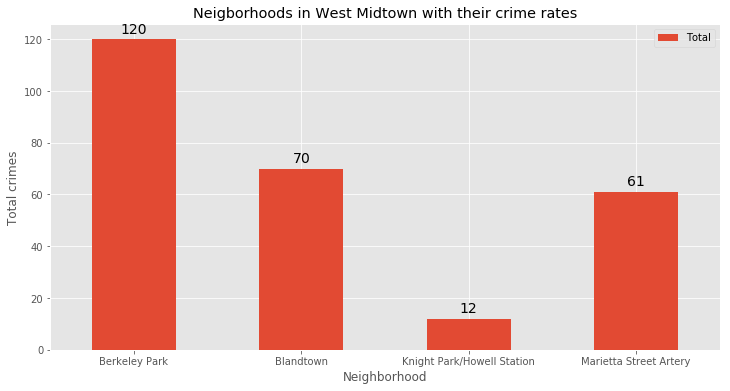

In [25]:
per_district = atl_crime_midtown[['Neighborhood','Total']]

per_district.set_index('Neighborhood',inplace = True)

ax = per_district.plot(kind='bar', figsize=(12, 6), rot=0)

ax.set_ylabel('Total crimes')
ax.set_xlabel('Neighborhood')
ax.set_title('Neigborhoods in West Midtown with their crime rates')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

Here, we see that Berkeley Park has the highest number of crime rate while Knight Park/Howell station has the least

In [26]:
westmidtown_data.head()

,Year,Crime,Neighborhood,Latitude,Longitude,District
0,2020,LARCENY,Berkeley Park,33.80077,-84.40869,West Midtown
1,2020,LARCENY,Berkeley Park,33.80388,-84.41278,West Midtown
2,2020,LARCENY,Berkeley Park,33.80121,-84.40791,West Midtown
3,2020,LARCENY,Berkeley Park,33.80388,-84.41278,West Midtown
4,2020,LARCENY,Berkeley Park,33.79835,-84.41575,West Midtown


In [27]:
#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

FOLIUM - This is a great visualization tool used to create interactive maps

Let us use Folium to visualize Atlanta and the neighborhoods in West Midtown

In [28]:
address = 'West Midtown, Atlanta, GA, USA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Atlanta, GA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Atlanta, GA are 33.7811275, -84.38636.


In [29]:
# create map of Midtown Atlanta using latitude and longitude values
map_midtown = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(westmidtown_data['Latitude'], westmidtown_data['Longitude'], westmidtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_midtown)  
    
map_midtown

FOURSQUARE API

Using Foursquare API, I will start exploring and clustering the neighborhoods

In [30]:
CLIENT_ID = 'XY3QDBKJ2SDJJOQXPQD5B0YKEGTWNO4JVFJW3ZC0E3IKR2PT' # your Foursquare ID
CLIENT_SECRET = 'WK111LOJUH41BEFUWCAZRC2XTQXXDT2VZUIO3B5Q5DGH4CKY' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XY3QDBKJ2SDJJOQXPQD5B0YKEGTWNO4JVFJW3ZC0E3IKR2PT
CLIENT_SECRET:WK111LOJUH41BEFUWCAZRC2XTQXXDT2VZUIO3B5Q5DGH4CKY


I will use the API to find nearby locations of these neighborhoods

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
      
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
atl_westmidtown_venues = getNearbyVenues(names=westmidtown_data['Neighborhood'],
                                   latitudes=westmidtown_data['Latitude'],
                                   longitudes=westmidtown_data['Longitude']
                                  )
atl_westmidtown_venues.head()

Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkeley Park
Berkel

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berkeley Park,33.80077,-84.40869,Ginya Izakaya,33.800719,-84.408292,Japanese Restaurant
1,Berkeley Park,33.80077,-84.40869,T.J. Maxx,33.802578,-84.410991,Department Store
2,Berkeley Park,33.80077,-84.40869,Ulta Beauty - Curbside Pickup Only,33.802659,-84.410859,Cosmetics Shop
3,Berkeley Park,33.80077,-84.40869,PetSmart,33.803344,-84.411369,Pet Store
4,Berkeley Park,33.80077,-84.40869,La Parrilla,33.803196,-84.412517,Mexican Restaurant


In [33]:
print(atl_westmidtown_venues.shape)
atl_westmidtown_venues.head()

(5452, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berkeley Park,33.80077,-84.40869,Ginya Izakaya,33.800719,-84.408292,Japanese Restaurant
1,Berkeley Park,33.80077,-84.40869,T.J. Maxx,33.802578,-84.410991,Department Store
2,Berkeley Park,33.80077,-84.40869,Ulta Beauty - Curbside Pickup Only,33.802659,-84.410859,Cosmetics Shop
3,Berkeley Park,33.80077,-84.40869,PetSmart,33.803344,-84.411369,Pet Store
4,Berkeley Park,33.80077,-84.40869,La Parrilla,33.803196,-84.412517,Mexican Restaurant


In [35]:
atl_westmidtown_venues['Neighborhood'].value_counts()

Berkeley Park                 2643
Marietta Street Artery        1675
Blandtown                     1043
Knight Park/Howell Station      91
Name: Neighborhood, dtype: int64

Modelling

Let's analyse these neighborhoods further

In [36]:
# one hot encoding
atl_westmidtown_venues_onehot = pd.get_dummies(atl_westmidtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
atl_westmidtown_venues_onehot['Neighborhood'] = atl_westmidtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [atl_westmidtown_venues_onehot.columns[-1]] + list(atl_westmidtown_venues_onehot.columns[:-1])
atl_westmidtown_venues_onehot= atl_westmidtown_venues_onehot[fixed_columns]

atl_westmidtown_venues_onehot.head()

,Neighborhood,American Restaurant,Animal Shelter,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beer Store,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Bus Stop,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Theater,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Entertainment Service,Event Space,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food Court,Food Truck,Frame Store,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Driving Range,Gourmet Shop,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,History Museum,Hot Dog Joint,Hotel,Ice Cream Shop,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kids Store,Kitchen Supply Store,Lake,Liquor Store,Men's Store,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Nightclub,Optical Shop,Other Event,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Recording Studio,Rental Car Location,Rental Service,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Strip Club,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Berkeley Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Berkeley Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Berkeley Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Berkeley Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Berkeley Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
atl_westmidtown_venues_onehot.shape

(5452, 133)

In [38]:
atl_westmidtown_venues_grouped = atl_westmidtown_venues_onehot.groupby('Neighborhood').mean().reset_index()
atl_westmidtown_venues_grouped

,Neighborhood,American Restaurant,Animal Shelter,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beer Store,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Bus Stop,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Theater,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Entertainment Service,Event Space,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food Court,Food Truck,Frame Store,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Driving Range,Gourmet Shop,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,History Museum,Hot Dog Joint,Hotel,Ice Cream Shop,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kids Store,Kitchen Supply Store,Lake,Liquor Store,Men's Store,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Nightclub,Optical Shop,Other Event,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Recording Studio,Rental Car Location,Rental Service,Reservoir,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Strip Club,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Berkeley Park,0.012486,0.000000,0.000757,0.000000,0.000000,0.000000,0.000000,0.005297,0.000000,0.000000,0.000000,0.000000,0.013621,0.006432,0.000000,0.007189,0.013999,0.015134,0.000000,0.000000,0.031782,0.030647,0.000000,0.019296,0.000000,0.000000,0.000000,0.013243,0.033674,0.012486,0.000000,0.00000,0.000000,0.003027,0.066213,0.003405,0.000000,0.000000,0.026485,0.003027,0.000757,0.005297,0.002649,0.024593,0.00227,0.000000,0.039728,0.000000,0.002649,0.009081,0.021566,0.000000,0.00000,0.000000,0.000378,0.00227,0.036701,0.017026,0.00000,0.000000,0.031404,0.000000,0.000000,0.018918,0.000378,0.002270,0.000000,0.000000,0.036701,0.000000,0.000000,0.000378,0.003784,0.000378,0.057889,0.020810,0.000000,0.000000,0.000000,0.000378,0.000000,0.011729,0.000000,0.000000,0.000000,0.012864,0.012486,0.000000,0.038214,0.020053,0.019296,0.000000,0.000000,0.021945,0.000757,0.000000,0.00454,0.000000,0.003027,0.000000,0.043511,0.000378,0.003405,0.000000,0.000000,0.000000,0.03216,0.002649,0.000000,0.000000,0.000000,0.000378,0.018918,0.000378,0.000000,0.000000,0.003784,0.029134,0.000000,0.000378,0.000000,0.000000,0.000000,0.000757,0.005675,0.000000,0.000000,0.019675,0.037079,0.000000,0.000000,0.000378
1,Blandtown,0.023011,0.000000,0.003835,0.012464,0.000000,0.000000,0.000000,0.012464,0.000000,0.012464,0.004794,0.000000,0.004794,0.038351,0.004794,0.003835,0.006711,0.000000,0.000000,0.000000,0.000000,0.028763,0.004794,0.014382,0.000000,0.000000,0.000959,0.000000,0.000000,0.000000,0.000000,0.00000,0.016299,0.000000,0.000000,0.018217,0.000000,0.002876,0.000000,0.001918,0.003835,0.042186,0.000000,0.003835,0.00000,0.000000,0.000000,0.000959,0.025887,0.147651,0.022052,0.018217,0.00000,0.038351,0.047939,0.00000,0.042186,0.030681,0.00000,0.004794,0.000000,0.000000,0.000000,0.000000,0.004794,0.013423,0.004794,0.000959,0.000000,0.004794,0.032598,0.000000,0.000000,0.023011,0.031640,0.010547,0.000000,0.030681,0.000000,0.005753,0.009588,0.002876,0.000000,0.012464,0.000000,0.000000,0.025887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018217,0.002876,0.00000,0.000000,0.004794,0.000000,0

In [40]:
atl_westmidtown_venues_grouped.shape

(4, 137)

In [39]:
num_top_venues = 5

for hood in atl_westmidtown_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = atl_westmidtown_venues_grouped[atl_westmidtown_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berkeley Park----
                venue  freq
0    Department Store  0.07
1  Mexican Restaurant  0.06
2      Sandwich Place  0.04
3                 Gym  0.04
4           Pet Store  0.04


----Blandtown----
                    venue  freq
0  Furniture / Home Store  0.15
1            Gourmet Shop  0.05
2                     Gym  0.04
3      Golf Driving Range  0.04
4             Event Space  0.04


----Knight Park/Howell Station----
                    venue  freq
0                     Gym  0.11
1             Coffee Shop  0.11
2  Furniture / Home Store  0.10
3   Performing Arts Venue  0.08
4    Gym / Fitness Center  0.07


----Marietta Street Artery----
                venue  freq
0         Coffee Shop  0.09
1         Pizza Place  0.05
2    Asian Restaurant  0.04
3                Café  0.04
4  Seafood Restaurant  0.03




In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = atl_westmidtown_venues_grouped['Neighborhood']

for ind in np.arange(atl_westmidtown_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(atl_westmidtown_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berkeley Park,Department Store,Mexican Restaurant,Sandwich Place,Food Truck,Pet Store,Video Store,Japanese Restaurant,Gym,Cosmetics Shop,Shopping Mall
1,Blandtown,Furniture / Home Store,Gourmet Shop,Event Space,Gym,Brewery,Golf Driving Range,Kitchen Supply Store,Mexican Restaurant,New American Restaurant,Gym / Fitness Center
2,Knight Park/Howell Station,Gym,Coffee Shop,Furniture / Home Store,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Tex-Mex Restaurant,American Restaurant,Dessert Shop
3,Marietta Street Artery,Coffee Shop,Pizza Place,Asian Restaurant,Café,Salon / Barbershop,Hot Dog Joint,Gym / Fitness Center,Diner,Art Gallery,BBQ Joint


K-MEANS

Using K-Means, I would cluster the neighborhoods into 4

In [42]:
# set number of clusters
kclusters = 4

atl_westmidtown_venues_grouped_clustering = atl_westmidtown_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(atl_westmidtown_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 1, 2], dtype=int32)

In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

westmidtown_merged = westmidtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
westmidtown_merged = westmidtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

westmidtown_merged.head() # check the last columns!

,Year,Crime,Neighborhood,Latitude,Longitude,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2020,LARCENY,Berkeley Park,33.80077,-84.40869,West Midtown,0,Department Store,Mexican Restaurant,Sandwich Place,Food Truck,Pet Store,Video Store,Japanese Restaurant,Gym,Cosmetics Shop,Shopping Mall
1,2020,LARCENY,Berkeley Park,33.80388,-84.41278,West Midtown,0,Department Store,Mexican Restaurant,Sandwich Place,Food Truck,Pet Store,Video Store,Japanese Restaurant,Gym,Cosmetics Shop,Shopping Mall
2,2020,LARCENY,Berkeley Park,33.80121,-84.40791,West Midtown,0,Department Store,Mexican Restaurant,Sandwich Place,Food Truck,Pet Store,Video Store,Japanese Restaurant,Gym,Cosmetics Shop,Shopping Mall
3,2020,LARCENY,Berkeley Park,33.80388,-84.41278,West Midtown,0,Department Store,Mexican Restaurant,Sandwich Place,Food Truck,Pet Store,Video Store,Japanese Restaurant,Gym,Cosmetics Shop,Shopping Mall
4,2020,LARCENY,Berkeley Park,33.79835,-84.41575,West Midtown,0,Department Store,Mexican Restaurant,Sandwich Place,Food Truck,Pet Store,Video Store,Japanese Restaurant,Gym,Cosmetics Shop,Shopping Mall


Visualizing the clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(westmidtown_merged['Latitude'], westmidtown_merged['Longitude'], westmidtown_merged['Neighborhood'], westmidtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examining the clusters to determine the discriminating venue categories that distinguish them

CLUSTER 1

In [59]:
westmidtown_merged.loc[westmidtown_merged['Cluster Labels'] == 0, westmidtown_merged.columns[[2] + list(range(5, westmidtown_merged.shape[1]))]]

,Neighborhood,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
1,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
2,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
3,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
4,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
5,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
6,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
7,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
8,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant
9,Berkeley Park,West Midtown,0,Department Store,Mexican Restaurant,Food Truck,Sandwich Place,Pet Store,Video Store,Japanese Restaurant,Cosmetics Shop,Shopping Mall,Chinese Restaurant


CLUSTER 2

In [60]:
westmidtown_merged.loc[westmidtown_merged['Cluster Labels'] == 1, westmidtown_merged.columns[[2] + list(range(5, westmidtown_merged.shape[1]))]]

,Neighborhood,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
190,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
191,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
192,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
193,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
194,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
195,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
196,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
197,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
198,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio
199,Knight Park/Howell Station,West Midtown,1,Furniture / Home Store,Coffee Shop,Gym,Performing Arts Venue,Gym / Fitness Center,Park,Gourmet Shop,Smoke Shop,Dessert Shop,Dance Studio


CLUSTER 3

In [61]:
westmidtown_merged.loc[westmidtown_merged['Cluster Labels'] == 2, westmidtown_merged.columns[[2] + list(range(5, westmidtown_merged.shape[1]))]]

,Neighborhood,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
202,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
203,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
204,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
205,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
206,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
207,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
208,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
209,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
210,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint
211,Marietta Street Artery,West Midtown,2,Coffee Shop,Pizza Place,Café,Asian Restaurant,Hot Dog Joint,Gym / Fitness Center,Salon / Barbershop,Diner,Art Gallery,BBQ Joint


CLUSTER 4

In [62]:
westmidtown_merged.loc[westmidtown_merged['Cluster Labels'] == 3, westmidtown_merged.columns[[2] + list(range(5, westmidtown_merged.shape[1]))]]

,Neighborhood,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
120,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
121,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
122,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
123,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
124,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
125,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
126,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
127,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
128,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant
129,Blandtown,West Midtown,3,Furniture / Home Store,Gourmet Shop,Brewery,Event Space,Gym,Golf Driving Range,Gym / Fitness Center,Kitchen Supply Store,Mexican Restaurant,New American Restaurant


RESULTS AND DISCUSSION SECTION

After the careful analysis of data, it was found that the safest district for the client to live in is the West Midtown resgion of Atlanta. Although the data only allowed us test for one year, it was seen that even in the crime report, there were only four major district with crime cases.
We can also see that these neighborhoods are not too far from the city, Atlanta. 
After clustering, it is eveident that no matter the neighborhood, out of the four we analyzed in West Midtown, my client would have multiple options she can pick from when she decides to settle down and get the restuarant job.

CONCLUSION

Although Knight Park/Howell station is the safest, it is not as close to Atlanta as Marietta street avery but still not as far compared to the other neighborhoods. I would advise my client to go for Knight Park and bear a short commute to Atlanta whenever she needs to go. This is putting safest at the core of decision making.